## Data preprocessing, analysis and plotting

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from datetime import datetime

In [40]:
data = pd.read_csv("Data/Belgium/ELIA/ods001.csv", delimiter=";")[749:]

In [44]:
data[::-1].head()

,Datetime,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Year,Month,Day,Hour,Minute
339163,2015-01-01T00:00:00+01:00,PT15M,10142.19,9496.05,8871.71,10120.38,9697.59,9076.64,10318.53,9833.37,2015,1,1,0,0
339162,2015-01-01T00:15:00+01:00,PT15M,10051.28,9329.17,8715.80,9942.53,9526.54,8916.55,10136.53,9653.31,2015,1,1,0,15
339161,2015-01-01T00:30:00+01:00,PT15M,9952.87,9174.72,8571.51,9777.92,9367.66,8767.84,9967.47,9473.22,2015,1,1,0,30
339160,2015-01-01T00:45:00+01:00,PT15M,9821.78,9025.46,8432.07,9618.85,9216.09,8625.97,9806.20,9319.45,2015,1,1,0,45
339159,2015-01-01T01:00:00+01:00,PT15M,9755.00,9222.33,8880.23,9564.44,10130.36,9777.87,10482.86,9203.25,2015,1,1,1,0


In [42]:
data["Total Load"].iloc[data["Total Load"].isna()] = np.median(data["Total Load"])

In [43]:
datetimes = [datetime.fromisoformat(i) for i in data["Datetime"].to_list()]
data["Year"] = [i.year for i in datetimes]
data["Month"] = [i.month for i in datetimes]
data["Day"] = [i.day for i in datetimes]
data["Hour"] = [i.hour for i in datetimes]
data["Minute"] = [i.minute for i in datetimes]

# Pre processing tools
We show them on the first month of the data.

In [70]:
load = np.array(data["Total Load"])[:24*15*31]

We plot the data:

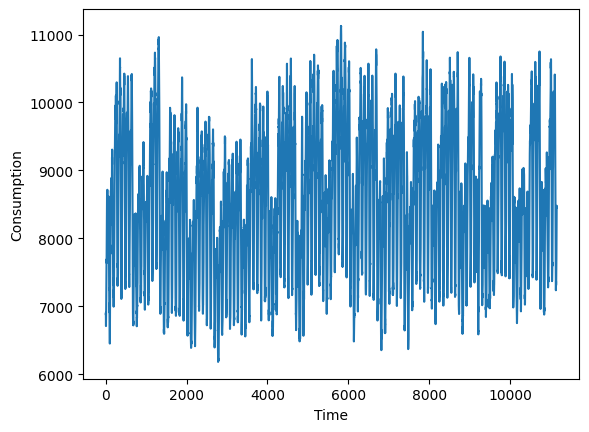

In [78]:
plt.plot(load)
plt.xlabel("Time")
plt.ylabel("Consumption")
plt.show()

## Spectrogram
This transform allows to get a visual representation of the frequency evolution through time.

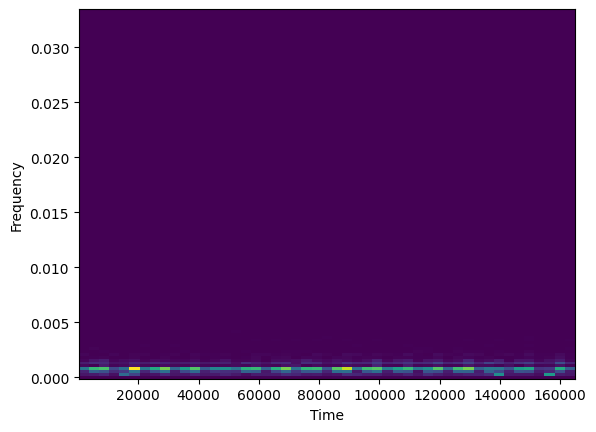

In [76]:
fs, t, Sxx = scipy.signal.spectrogram(load, fs=1/15)
plt.pcolormesh(t, fs, Sxx)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

## Empirical Mode Decomposition
This decomposition allows to compute simpler oscillation, which, sum together, compose the original signal.

<Axes: xlabel='Time (samples)'>

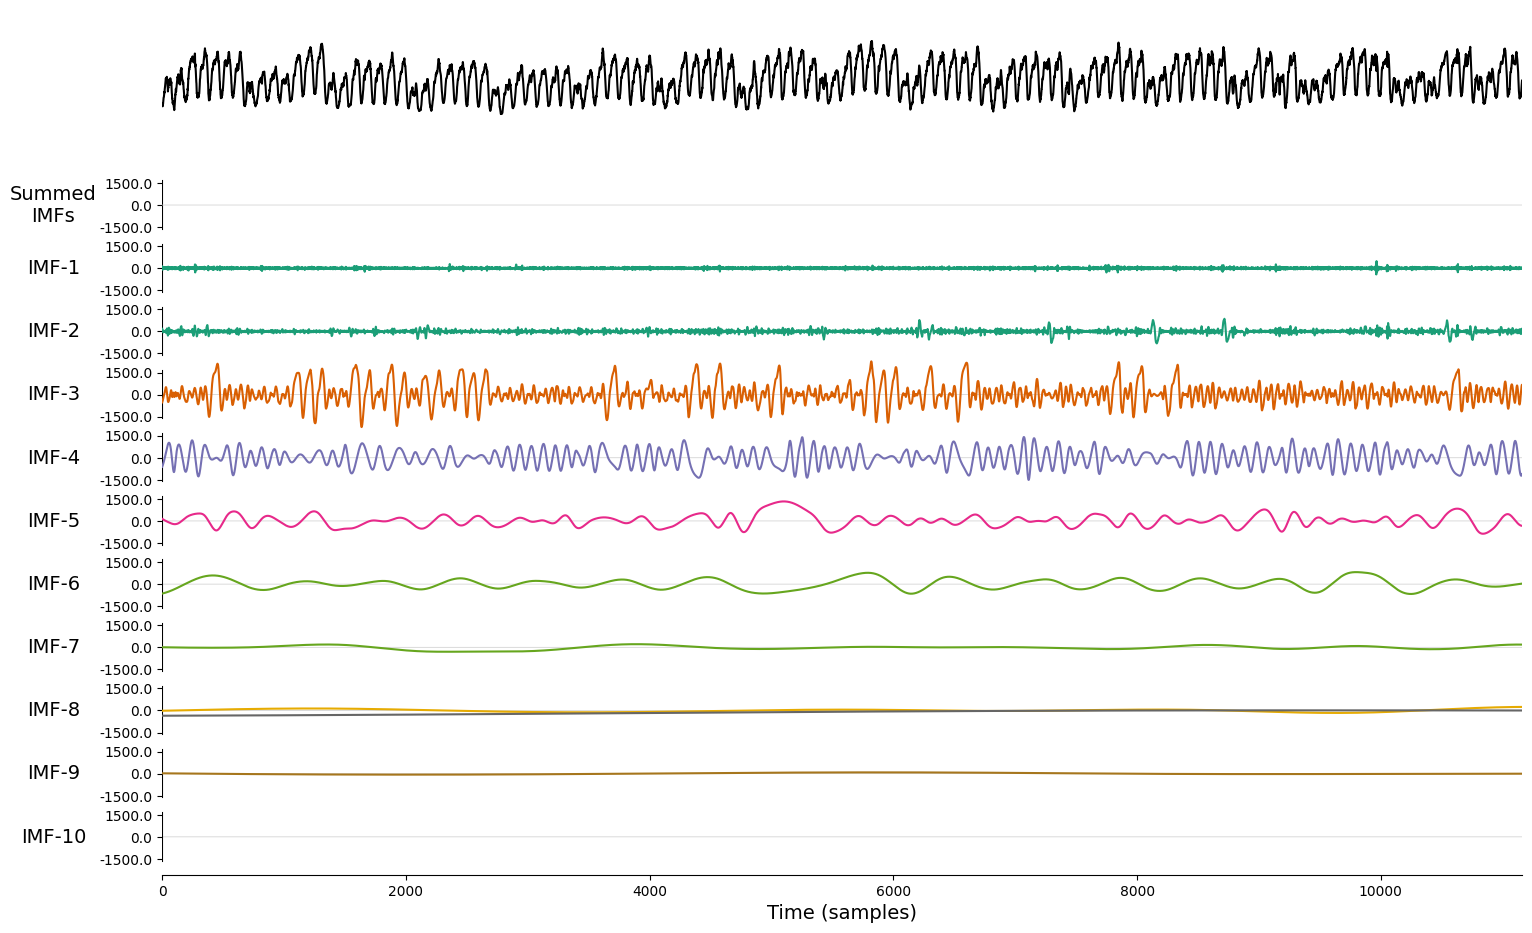

In [46]:
import emd
imf = emd.sift.sift(load)
emd.plotting.plot_imfs(imf)